In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
'''
Part 1: UFO
'''
ufo = pd.read_csv('../data/ufo.csv')   # can also read csvs directly from the web!
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [18]:
# 1. change the column names so that each name has no spaces
#           and all lower case (replace spaces with underscores)

new_col_list=[]
for col in ufo.columns:
    new_col_list.append(col.lower().replace(" ","_"))
print(new_col_list)
ufo.columns=new_col_list
print(ufo.head())

['city', 'colors_reported', 'shape_reported', 'state', 'time']
                   city colors_reported shape_reported state             time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00


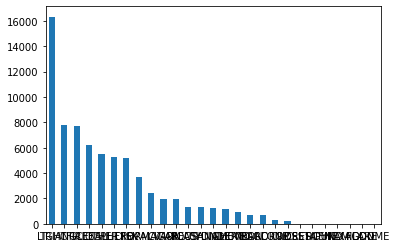

In [23]:
# 2. Show a bar chart of all shapes reported

#ufo.groupby('shape_reported').count()
val=ufo['shape_reported'].value_counts()

ax = val.plot.bar(x='shape_reported', y='val', rot=0)

In [5]:
# 3. Show a dataframe that only displays the reportings from Utah



In [6]:
# 4. Show a dataframe that only displays the reportings from Texas



In [7]:
# 5. Show a dataframe that only displays the reportings from Utah OR Texas



In [8]:
# 6. Which shape is reported most often?



In [9]:
'''
Part 2: FIFA GOALS
'''

goals = pd.read_csv('../data/fifa_goals.csv')
goals.sort_index(by='team1score', inplace = True)
goals.head()

/Users/pgao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,game_id,minute,player,team1score,team2score
1103,422,80,VlaoviÄ,0,2
1414,551,34,J. Cole,0,1
1423,554,60,FlÃ¡vio,0,1
1425,556,10,Å½igiÄ,0,1
1426,556,20,IliÄ,0,2


In [10]:
# 1. Some elements in the minute column have a  '+', remove it and cast each element as an int!
#     Hint: To replace, use a .apply lambda function to remove any plus symbols
#     Hint: look up pandas dataframes astype method
#     To check use the dataframe.describe() method to see if it is an integer



In [11]:
# 2. Show goals scored in the first 5 minutes of a game



In [12]:
# 3. Show goals scored after the regulation 90 minutes is over



In [13]:
# 4. Show the top scoring players



In [14]:
# 5. Show a histogram (distribution) of minutes with 20 bins



In [15]:
# 6. Show a histogram of the number of goals scored by players

